In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ast

## **For Understanding Initial Data Scope**

In [2]:
data = pd.read_csv("pc_igdb_cleaned.csv", index_col=0, dtype={"id": str}, parse_dates=['first_release_date'])
df = pd.DataFrame(data)

In [3]:
df.head(5)

,id,aggregated_rating,aggregated_rating_count,first_release_date,name,rating,rating_count,total_rating,total_rating_count,game_type,popularity_score,popularity_source_id,popularity_type_id,ttb_normally,ttb_hastily,ttb_completely,ttb_submission_count,genre_names
0,364,91.000000,1.0,1999-02-28,Heroes of Might and Magic III: The Restoration...,89.814800,605.0,90.407400,606.0,Main Game,444.838034,IGDB,Played,NaN,NaN,NaN,NaN,"['Role-playing (RPG)', 'Strategy', 'Turn-based..."
1,1052,66.125000,8.0,2011-11-01,The Lord of the Rings: War in the North,70.604621,145.0,68.364810,153.0,Main Game,37.357109,IGDB,Playing,NaN,NaN,NaN,NaN,"['Role-playing (RPG)', 'Strategy', ""Hack and s..."
2,483,72.333333,2.0,2004-06-17,Silent Hill 4: The Room,76.007350,236.0,74.170342,238.0,Main Game,234.718686,IGDB,Played,NaN,NaN,NaN,NaN,['Adventure']
3,518,73.333333,3.0,2006-10-24,F.E.A.R. Extraction Point,79.386304,98.0,76.359819,101.0,Standalone Expansion,12.452370,IGDB,Playing,NaN,NaN,NaN,NaN,['Shooter']
4,329,72.000000,2.0,2002-04-05,Dungeon Siege,78.778305,113.0,75.389153,115.0,Main Game,7.947691,Steam,24hr Peak Players,NaN,NaN,NaN,NaN,['Role-playing (RPG)']


In [4]:
#Understand the scope of data
print(df.shape)
print(df.columns)
print(df.info())

(2277, 18)
Index(['id', 'aggregated_rating', 'aggregated_rating_count',
       'first_release_date', 'name', 'rating', 'rating_count', 'total_rating',
       'total_rating_count', 'game_type', 'popularity_score',
       'popularity_source_id', 'popularity_type_id', 'ttb_normally',
       'ttb_hastily', 'ttb_completely', 'ttb_submission_count', 'genre_names'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2277 entries, 0 to 2276
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2277 non-null   object        
 1   aggregated_rating        2277 non-null   float64       
 2   aggregated_rating_count  2277 non-null   float64       
 3   first_release_date       2248 non-null   datetime64[ns]
 4   name                     2277 non-null   object        
 5   rating                   1546 non-null   float64       
 6   rating_count         

In [5]:
df.describe()

,aggregated_rating,aggregated_rating_count,first_release_date,rating,rating_count,total_rating,total_rating_count,popularity_score,ttb_normally,ttb_hastily,ttb_completely,ttb_submission_count
count,2277.000000,2277.000000,2248,1546.000000,1546.000000,1718.000000,1718.000000,2277.000000,79.000000,49.000000,6.100000e+01,106.000000
mean,72.161122,1.467721,2006-07-06 22:04:03.416369920,69.369876,116.383571,68.804706,106.676950,47.994456,69939.860759,50591.020408,1.338018e+06,2.386792
min,0.000000,0.000000,1979-06-30 00:00:00,10.177578,0.000000,10.177578,0.000000,0.000000,2400.000000,4260.000000,2.400000e+03,1.000000
25%,73.354167,0.000000,2000-12-06 00:00:00,60.000000,5.000000,60.000000,3.000000,1.637470,18450.000000,15600.000000,2.880000e+04,1.000000
50%,73.354167,0.000000,2006-09-17 00:00:00,71.952129,17.000000,71.118637,14.000000,5.411739,42960.000000,31200.000000,7.200000e+04,1.000000
75%,73.354167,2.000000,2012-07-13 12:00:00,79.954781,71.000000,79.915353,61.000000,22.726092,95280.000000,57600.000000,1.728000e+05,2.000000
max,100.000000,27.000000,2020-11-26 00:00:00,98.982942,4956.000000,98.982942,4983.000000,6686.819698,432000.000000,360000.000000,7.200000e+07,23.000000
std,10.589442,2.729845,NaN,14.147545,356.347835,14.442782,341.266869,245.035635,79214.906527,64427.803239,9.203430e+06,3.151933


In [6]:
games = df.copy()

## **Exploratory Data Analysis**

# **1. Rating-Year Related Analysis**

Rating -> Average IGDB user rating

In [7]:
games['release_year'] = pd.to_datetime(games['first_release_date'], errors='coerce').dt.year
games['release_year'] = games['release_year'].astype('Int64')  # Pandas nullable integer

In [8]:
# To reduce small group bias in specific games, filtered for games with a rating count greater than the bottom 25th percentile.
rating_count_filtered = games[games['rating_count'] > 5]
yearly_avg_rating = rating_count_filtered.groupby('release_year')['rating'].mean()

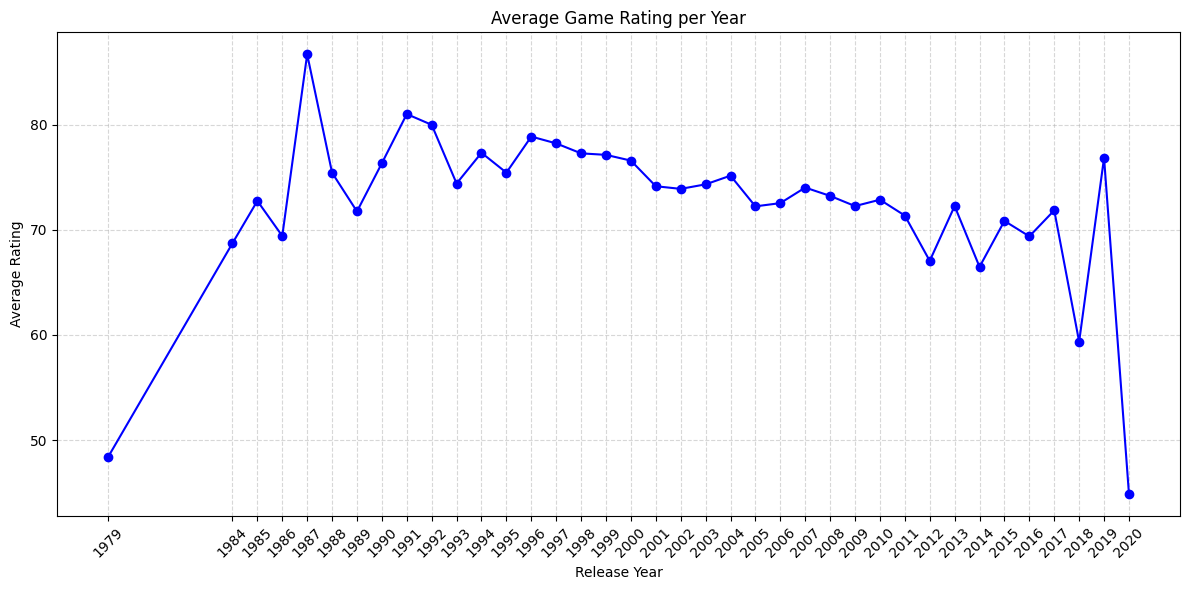

In [9]:
plt.figure(figsize=(12, 6))
yearly_avg_rating.plot(marker='o', color='blue')
plt.title('Average Game Rating per Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=yearly_avg_rating.index, rotation=45)
plt.tight_layout()
plt.show()

In the graph above, we can observe that recent games have not received enough rating reviews from IGDB users, which limits our ability to gain insights from data after 2017. However, we can still see a slight yearly decline in average ratings. To verify whether this trend reflects a broader pattern or is simply due to IGDB user perspectives, we can conduct further visualizations using other rating sources.

aggregated_rating -> Rating based on external critic scores

In [10]:
aggregated_count_filtered = games[games['aggregated_rating_count'] > 1]
aggregated_yearly_avg_rating = aggregated_count_filtered.groupby('release_year')['aggregated_rating'].mean()

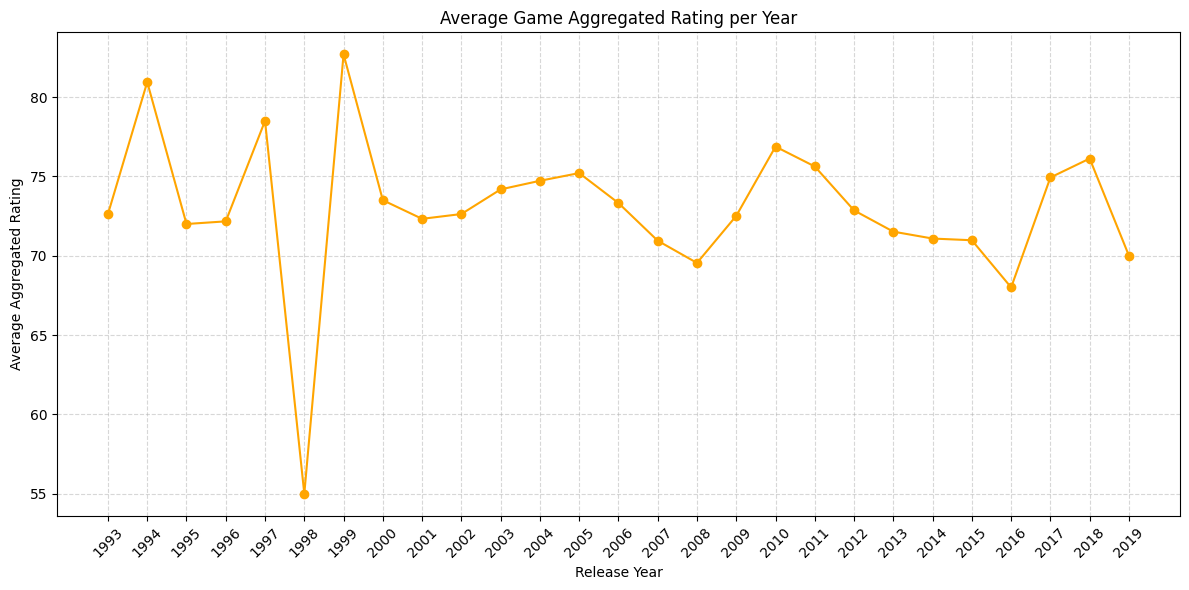

In [11]:
plt.figure(figsize=(12, 6))
aggregated_yearly_avg_rating.plot(marker='o', color='orange')
plt.title('Average Game Aggregated Rating per Year')
plt.xlabel('Release Year')
plt.ylabel('Average Aggregated Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=aggregated_yearly_avg_rating.index, rotation=45)
plt.tight_layout()
plt.show()


total_rating -> Average rating based on both IGDB user and external critic scores

In [12]:
total_count_filtered = games[games['total_rating_count'] > 3]
total_yearly_avg_rating = total_count_filtered.groupby('release_year')['total_rating'].mean()

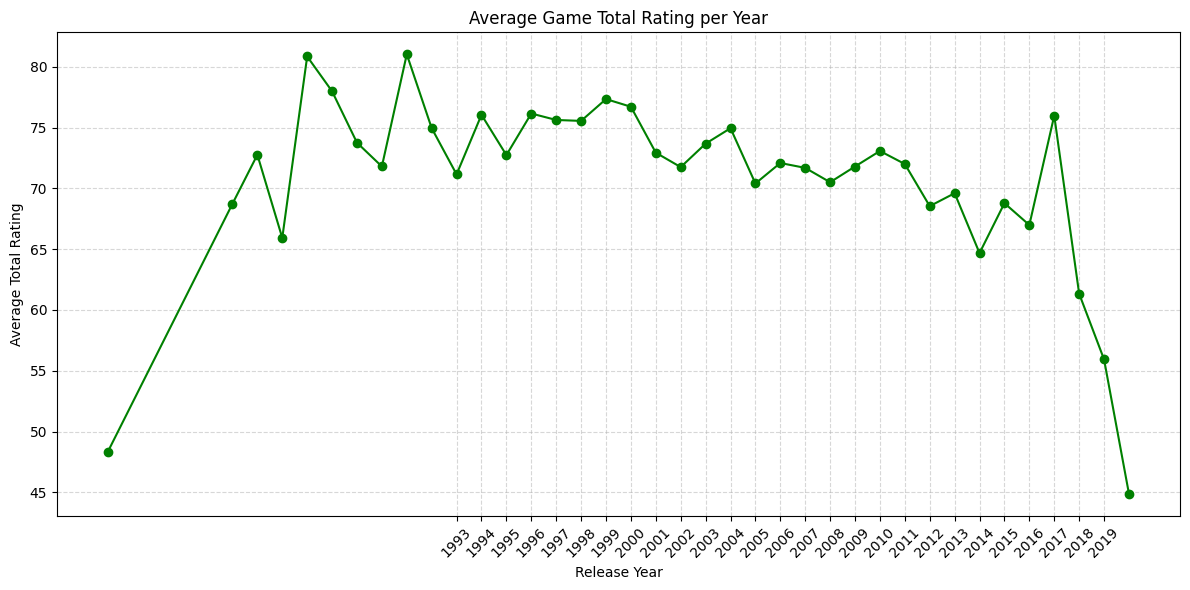

In [13]:
plt.figure(figsize=(12, 6))
total_yearly_avg_rating.plot(marker='o', color='g')
plt.title('Average Game Total Rating per Year')
plt.xlabel('Release Year')
plt.ylabel('Average Total Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=aggregated_yearly_avg_rating.index, rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1800x900 with 0 Axes>

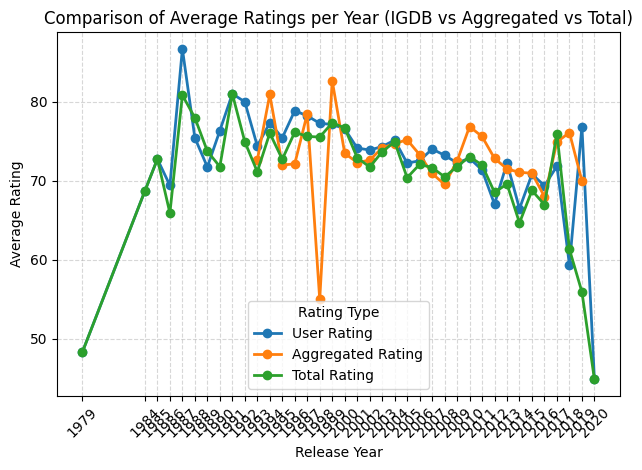

In [14]:
combined_df = pd.concat([
    yearly_avg_rating.rename('User Rating'),
    aggregated_yearly_avg_rating.rename('Aggregated Rating'),
    total_yearly_avg_rating.rename('Total Rating')
], axis=1)

plt.figure(figsize=(18, 9))
combined_df.plot(marker='o', linewidth=2)

plt.title('Comparison of Average Ratings per Year (IGDB vs Aggregated vs Total)')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(ticks=combined_df.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Rating Type')
plt.tight_layout()
plt.show()

The chart above combine the yearly average ratings of video games from three perspectives: User Rating (IGDB community scores), Aggregated Rating (external critic reviews), and Total Rating (a weighted combination of both).

- **Consistent Trends Across All Rating Types**

All three rating types follow a highly consistent trend over time, which shows varous sources whether player sentiment or professional reviews the perception of game quality tends to align.
-> Aside from game quality, one possible explanation is the psychological expectation from players and critics toward the games and the brand. There is often an assumption that a company’s newer games will be better, or that a new game engine will deliver higher-quality experiences. As a result, overly high expectations before playing may lead to relatively harsher ratings.

- **Long-Term Decline with Cyclical Peaks**

While the overall trajectory shows a gradual decline in average game ratings from the early 2000s onward, the trend is not linear. Instead, we observe cyclical peaks every 4–5 years, possibly tied to major platform releases, genre innovation, or clusters of critically acclaimed titles.

#**2. Rating-Genre Related Analysis**

Which genres tend to receive higher user ratings on average?

In [15]:
genre_rating_df = df.copy()
genre_rating_df['genre_names'] = genre_rating_df['genre_names'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
genre_rating_df = genre_rating_df[['rating', 'aggregated_rating', 'total_rating', 'genre_names']].explode('genre_names')

In [16]:
igdb_rating_stats = genre_rating_df[genre_rating_df['rating'].notna()].groupby('genre_names')['rating'].agg(['mean', 'count']).rename(columns={'mean': 'igdb_rating'})
agg_rating_stats = genre_rating_df[genre_rating_df['aggregated_rating'].notna()].groupby('genre_names')['aggregated_rating'].agg(['mean', 'count']).rename(columns={'mean': 'agg_rating'})
total_rating_stats = genre_rating_df[genre_rating_df['total_rating'].notna()].groupby('genre_names')['total_rating'].agg(['mean', 'count']).rename(columns={'mean':'total_rating'})

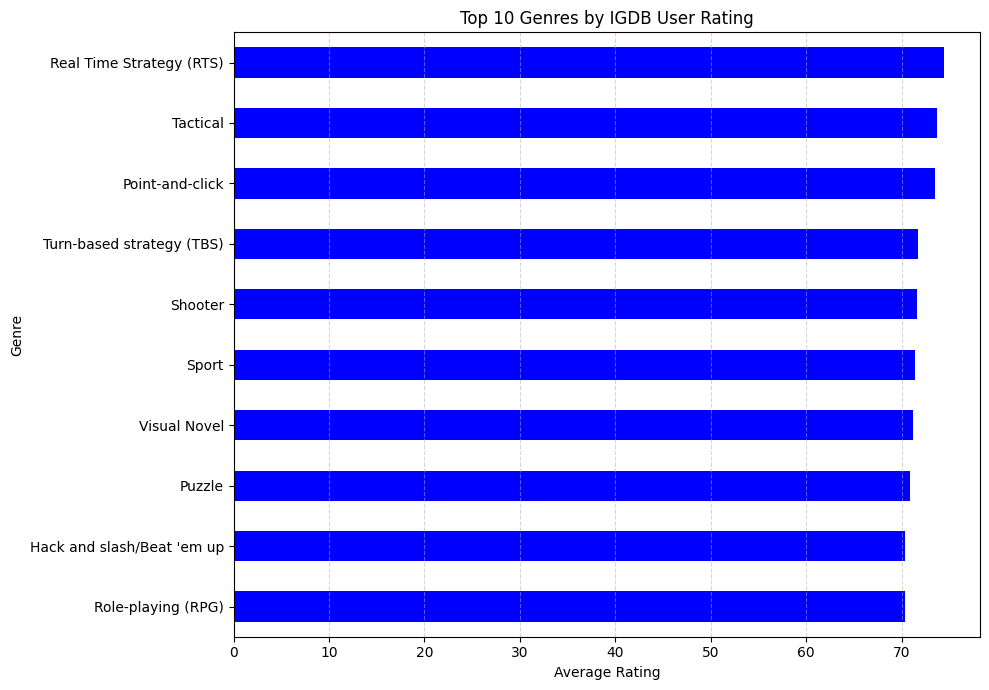

In [17]:
igdb_rating_stats.sort_values(by='igdb_rating').tail(10).plot(
    kind='barh', y='igdb_rating', figsize=(10, 7), color='blue', legend=False
)
plt.title('Top 10 Genres by IGDB User Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

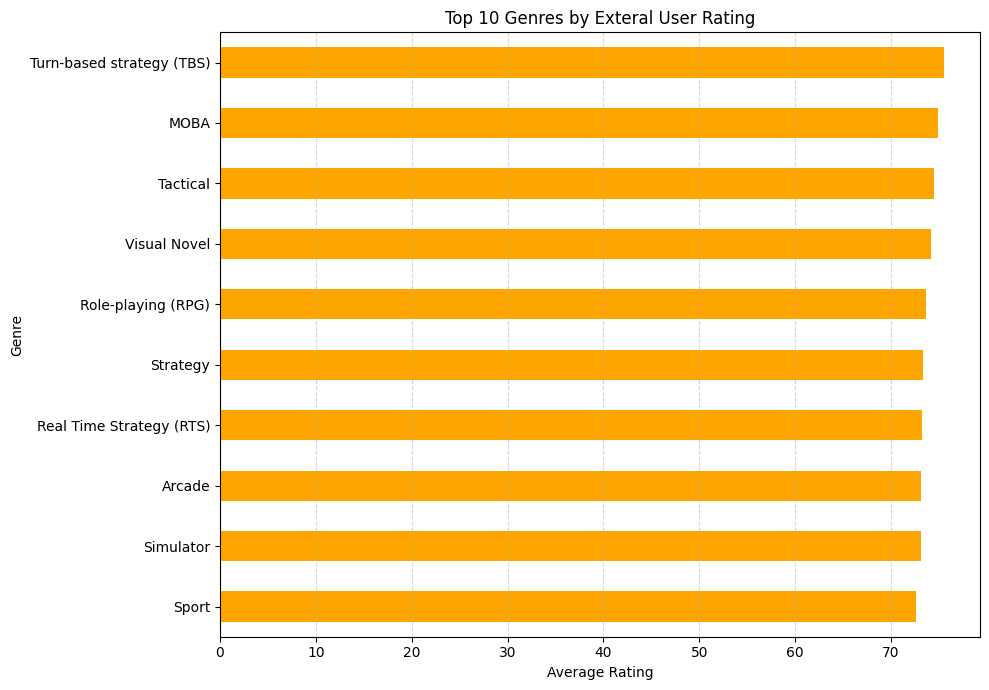

In [18]:
agg_rating_stats.sort_values(by='agg_rating').tail(10).plot(
    kind='barh', y='agg_rating', figsize=(10, 7), color='orange', legend=False
)
plt.title('Top 10 Genres by Exteral User Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

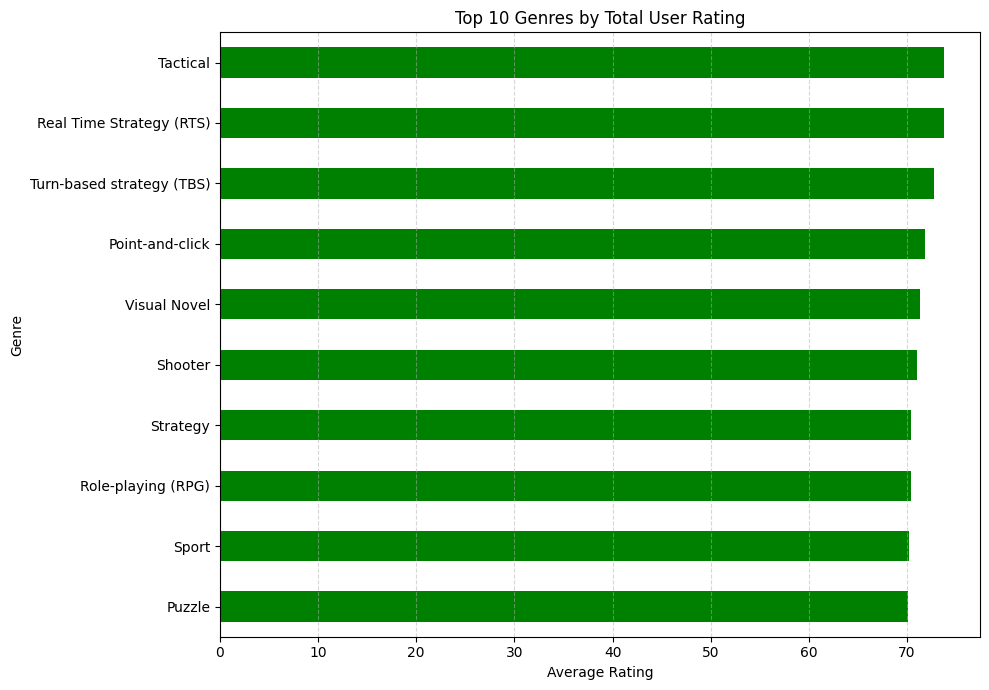

In [19]:
total_rating_stats.sort_values(by='total_rating').tail(10).plot(
    kind='barh', y='total_rating', figsize=(10, 7), color='green', legend=False
)
plt.title('Top 10 Genres by Total User Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

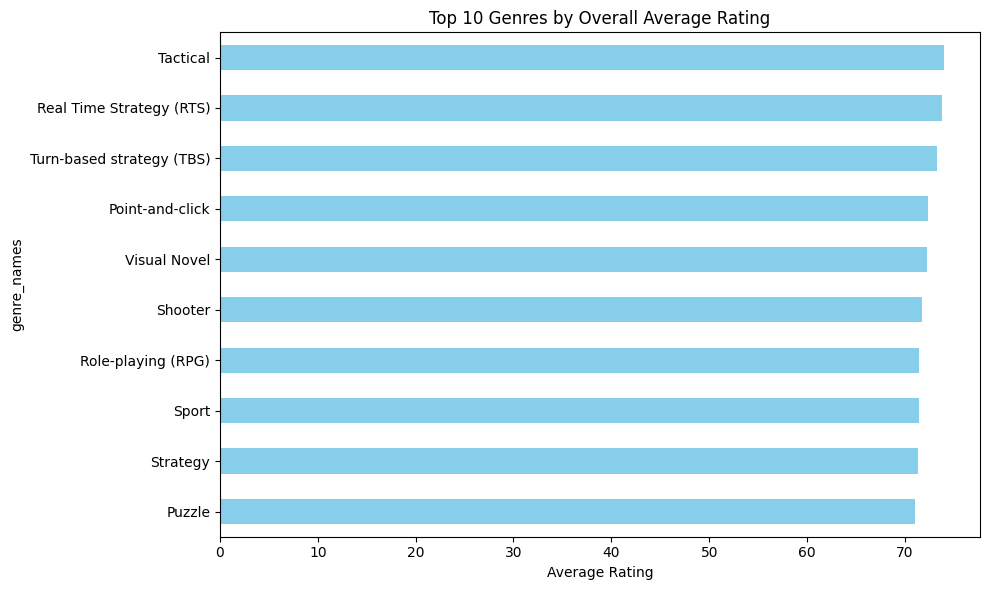

In [20]:
combined = igdb_rating_stats[['igdb_rating']].join([
    agg_rating_stats[['agg_rating']],
    total_rating_stats[['total_rating']]
])

combined['average'] = combined.mean(axis=1)
top_genres = combined['average'].sort_values(ascending=False).head(10)

top_genres.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Genres by Overall Average Rating')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

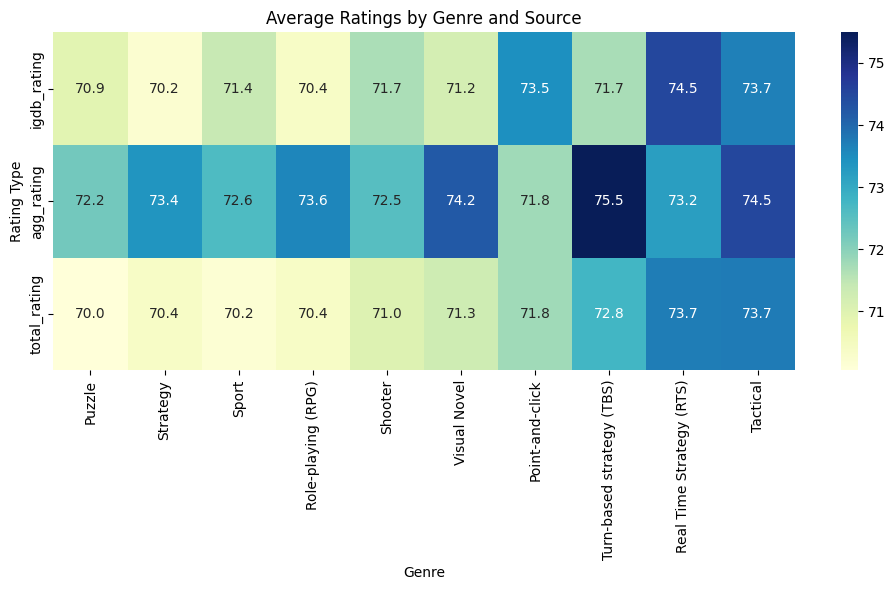

In [21]:
top_genre_names = combined['average'].sort_values(ascending=False).head(10).index
top_combined = combined.loc[top_genre_names].sort_values(by='average')

plt.figure(figsize=(10, 6))
sns.heatmap(top_combined.drop(columns='average').T, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Average Ratings by Genre and Source')
plt.xlabel('Genre')
plt.ylabel('Rating Type')
plt.tight_layout()
plt.show()

Based on the charts above, we can observe that, overall, **aggregated ratings tend to be more generous**, with generally higher scores. **RTS and Tactical genres consistently receive high ratings** across all three sources. Interestingly, there is a noticeable difference in how **IGDB and aggregated sources rate the TBS genre**.

One possible explanation is that IGDB users often evaluate games based on **viewing experience**, as many are also spectators. TBS games typically have **slower pacing, less visual stimulation, and a higher entry barrier for viewers**, which may lead to the impression of being "a little bit boring" if they have not played the game themselves.

On the other hand, **external critic scores** are primarily written by media professionals and reviewers who have actually played the game. As a result, they are more likely to appreciate the **strategic depth, replayability, and tactical enjoyment** of TBS games, which contributes to their higher ratings from critics.

<ipython-input-22-008370407686>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='total_rating', y='genre_names', palette='coolwarm')


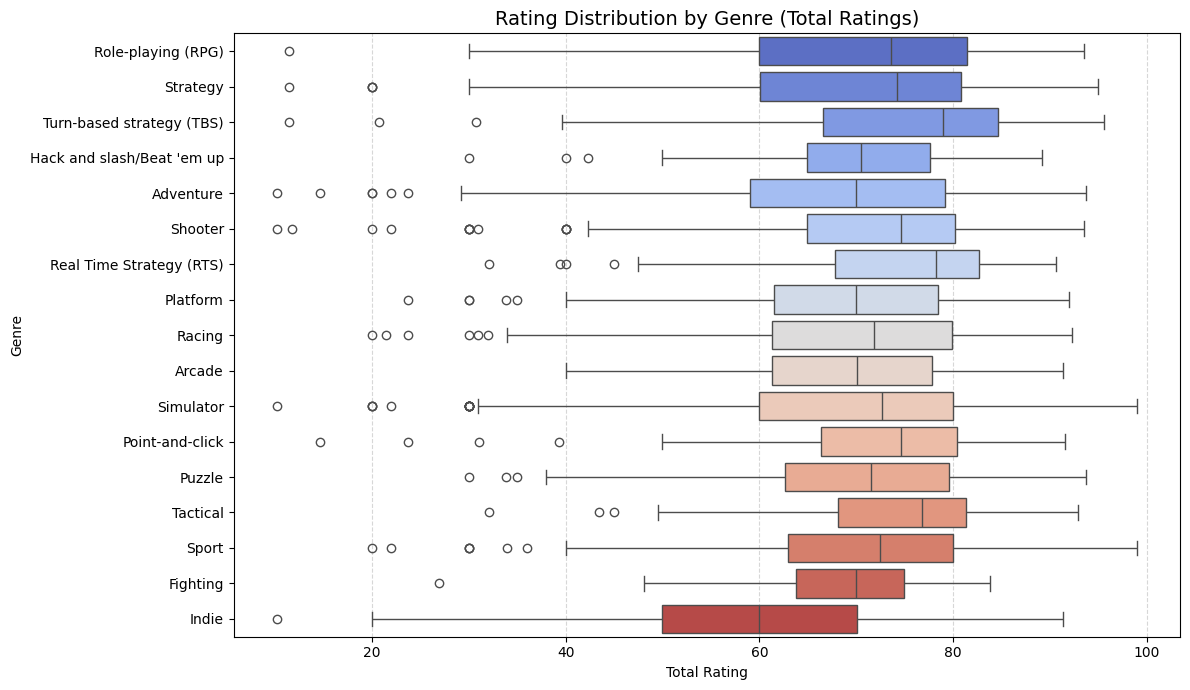

In [22]:
genre_counts = genre_rating_df['genre_names'].value_counts()
valid_genres = genre_counts[genre_counts >= 20].index
filtered_df = genre_rating_df[genre_rating_df['genre_names'].isin(valid_genres)]
filtered_df = filtered_df.reset_index(drop=True)

plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_df, x='total_rating', y='genre_names', palette='coolwarm')
plt.title('Rating Distribution by Genre (Total Ratings)', fontsize=14)
plt.xlabel('Total Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In the boxplot we can oberved three types of condition:

1. **Stable and High Rating:** Genres like RTS, RPG, Hack-and-Slash, and Tactical show high medians with concentrated rating distributions. This suggests that these types of games are consistently well-received by players and maintain stable quality across different titles.

2. **Unstable with Great Differentiation**: Genres such as Indie and Simulator exhibit broad rating distributions. The variation in reception indicates that game quality within these types is difficult to predict or control, leading to both highly rated successes and poorly received titles.

3. **Moderate with More Outliers**: Genres like Arcade and Puzzle show moderate medians but relatively more outliers. These games often target casual audiences and are quicker to play, making them a potentially effective investment—development costs are lower, yet they can achieve solid returns.


# **3. Rating-Popularity Score Analysis**

How is the relationship between a game's total rating and its popularity score?

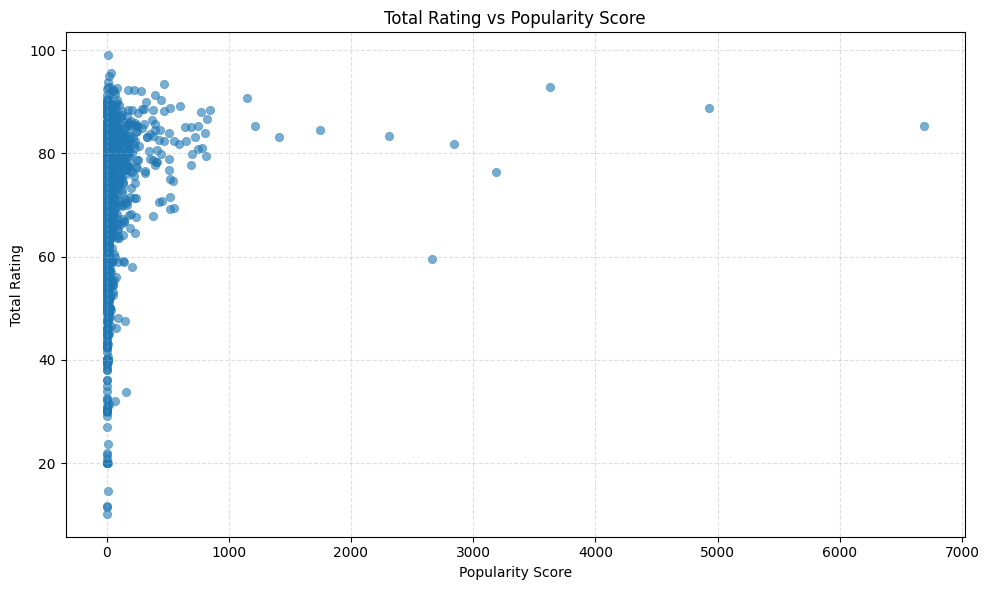

In [23]:
pop_rating_df = games[(games['total_rating'].notna()) & (games['popularity_score'].notna())]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pop_rating_df,
    x='popularity_score',
    y='total_rating',
    alpha=0.6,
    edgecolor=None
)

plt.title('Total Rating vs Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Total Rating')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The majority of popularity scores fall within the range of 0 to 850, so the graph below is shown in a zoomed-in view to better analyze the bulk of the data.

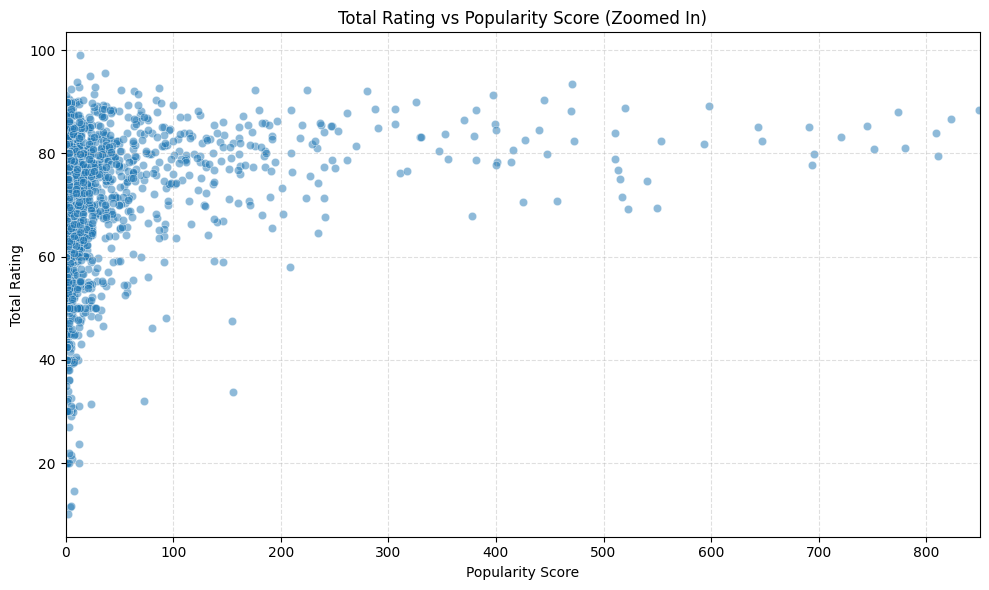

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pop_rating_df, x='popularity_score', y='total_rating', alpha=0.5)
plt.xlim(0, 850)
plt.title('Total Rating vs Popularity Score (Zoomed In)')
plt.xlabel('Popularity Score')
plt.ylabel('Total Rating')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

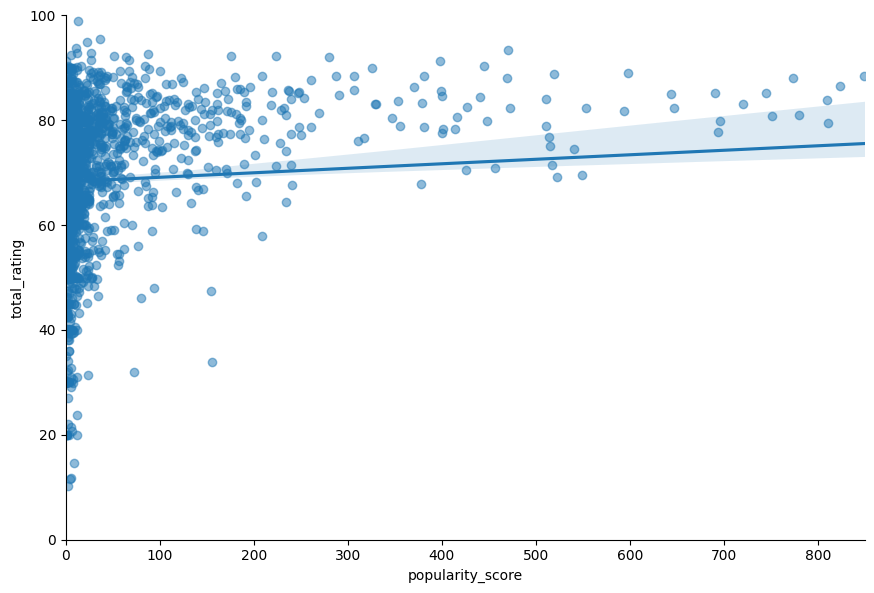

In [25]:
g = sns.lmplot(
    data=pop_rating_df,
    x='popularity_score',
    y='total_rating',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.5}
)

g.set(xlim=(0, 850))
g.set(ylim=(0, 100))

We can observe that the regression line is slightly upward-sloping, indicating a weak positive correlation between a game's popularity and its total rating.

Most data points are densely clustered near the lower popularity range (0–100), with a wide spread of ratings from very low (~10) to nearly perfect (100).

A noticeable number of highly rated games remain in the low popularity range, suggesting there have some underrated titles.

In this grpah we can obviously confirm that **popularity does not guarantee quality**. While famous games tend to have higher ratings on average, the correlation is weak and not predictive.

In [26]:
#The values are based on the 25th and 75th percentiles of total rating and popularity.
underrated = games[(df['total_rating'] > 79.92) & (games['popularity_score'] < 1.64)].sort_values(by='total_rating', ascending=False).head(10)

overhyped = games[(games['total_rating'] < 60) & (games['popularity_score'] > 22.73)].sort_values(by='popularity_score', ascending=False).head(10)

<ipython-input-27-262665daefe9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=underrated, x='total_rating', y='name', palette='YlGnBu')


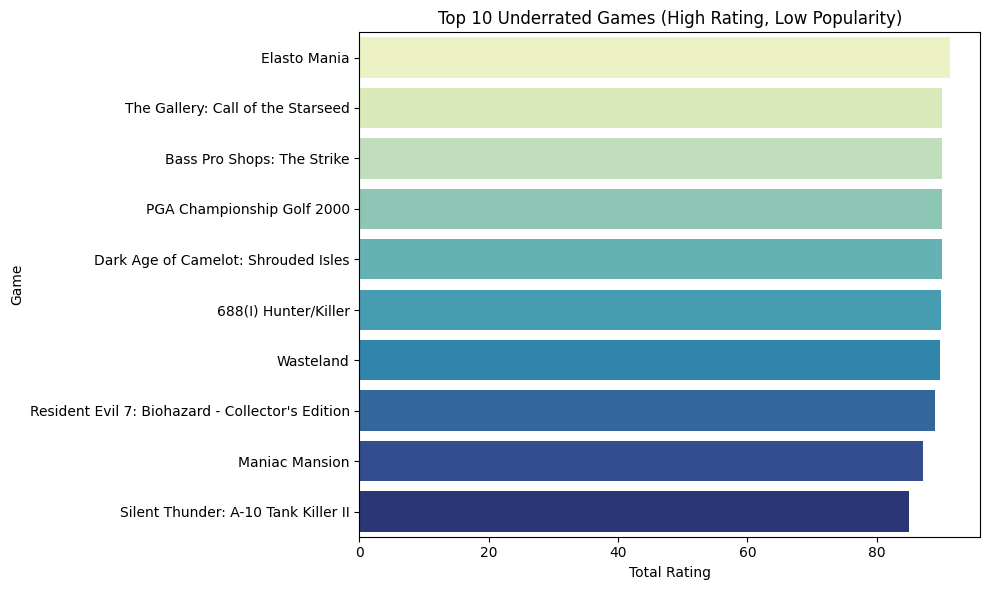

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=underrated, x='total_rating', y='name', palette='YlGnBu')
plt.title('Top 10 Underrated Games (High Rating, Low Popularity)')
plt.xlabel('Total Rating')
plt.ylabel('Game')
plt.tight_layout()
plt.show()

<ipython-input-28-3b7089e32106>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overhyped, x='popularity_score', y='name', palette='OrRd')


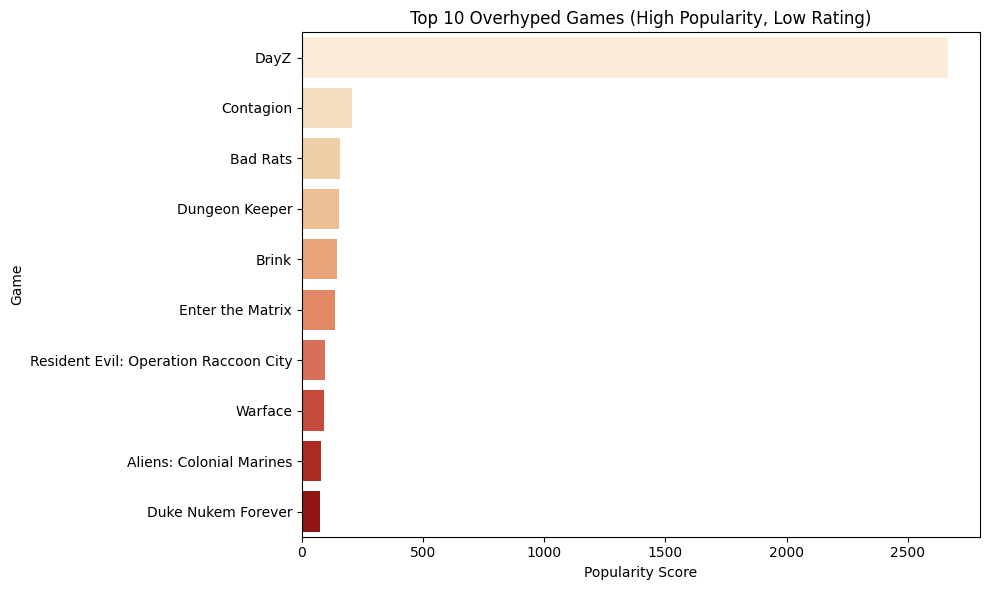

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=overhyped, x='popularity_score', y='name', palette='OrRd')
plt.title('Top 10 Overhyped Games (High Popularity, Low Rating)')
plt.xlabel('Popularity Score')
plt.ylabel('Game')
plt.tight_layout()
plt.show()

#**4.Popularity-Genre Related Anlysis**
Which Genre having better popularity score? which may having higher influence or visibility.

In [40]:
pop_gen = games[['popularity_score', 'popularity_source_id', 'popularity_type_id', 'genre_names']]

In [68]:
pop_gen.head(5)

,popularity_score,popularity_source_id,popularity_type_id,genre_names
0,444.838034,IGDB,Played,Role-playing (RPG)
0,444.838034,IGDB,Played,Strategy
0,444.838034,IGDB,Played,Turn-based strategy (TBS)
1,37.357109,IGDB,Playing,Role-playing (RPG)
1,37.357109,IGDB,Playing,Strategy


In [74]:
genre_pop_stats = pop_gen[pop_gen['popularity_score'].notna()] \
    .groupby('genre_names')['popularity_score'] \
    .agg(['mean', 'count']) \
    .sort_values(by='count')

genre_pop_stats.head(10)

,mean,count
genre_names,,
Pinball,2.927298,5
MOBA,134.189893,7
Quiz/Trivia,15.298176,16
Card & Board Game,10.323981,17
Music,11.691131,18
Visual Novel,20.887535,19
Fighting,36.948396,58
Hack and slash/Beat 'em up,88.350311,80
Arcade,20.693774,105


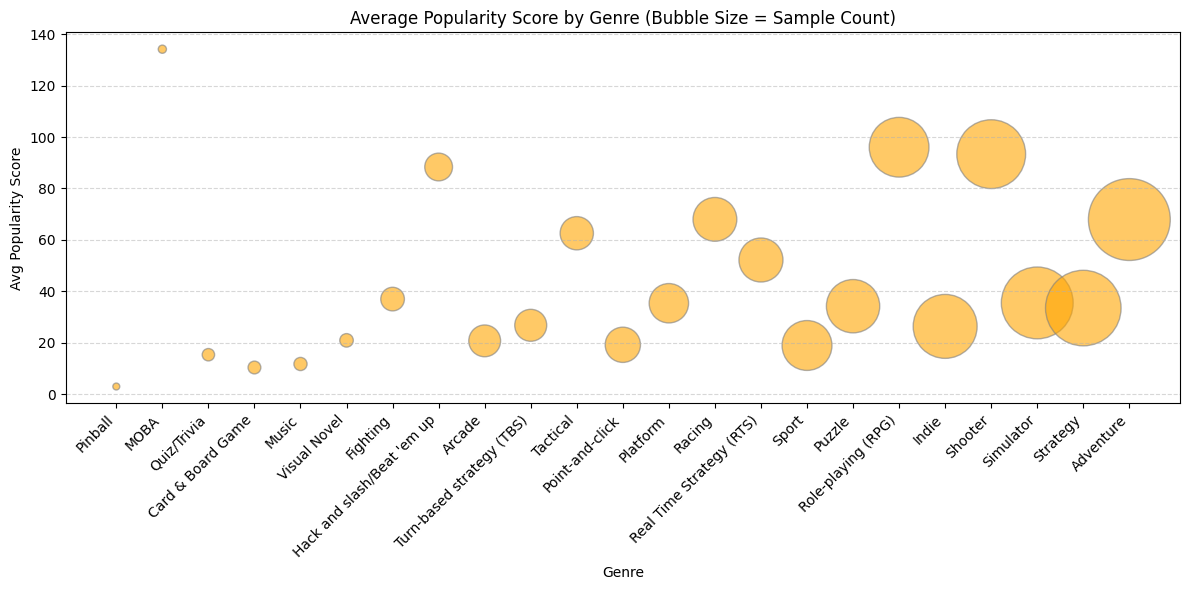

In [76]:
plt.figure(figsize=(12, 6))
plt.scatter(
    x=genre_pop_stats.index,
    y=genre_pop_stats['mean'],
    s=genre_pop_stats['count'] * 5,
    alpha=0.6,
    color='orange',
    edgecolor='gray'
)
plt.xticks(rotation=45, ha='right')
plt.title('Average Popularity Score by Genre (Bubble Size = Sample Count)')
plt.xlabel('Genre')
plt.ylabel('Avg Popularity Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [41]:
pop_gen['genre_names'] = pop_gen['genre_names'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
pop_gen = pop_gen.explode('genre_names')

<ipython-input-41-5b90aca74316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_gen['genre_names'] = pop_gen['genre_names'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


What are top 10 Genres have highest popularity score

In [57]:
pop_stats = pop_gen[pop_gen['popularity_score'].notna()].groupby('genre_names')['popularity_score'].agg(['mean'])

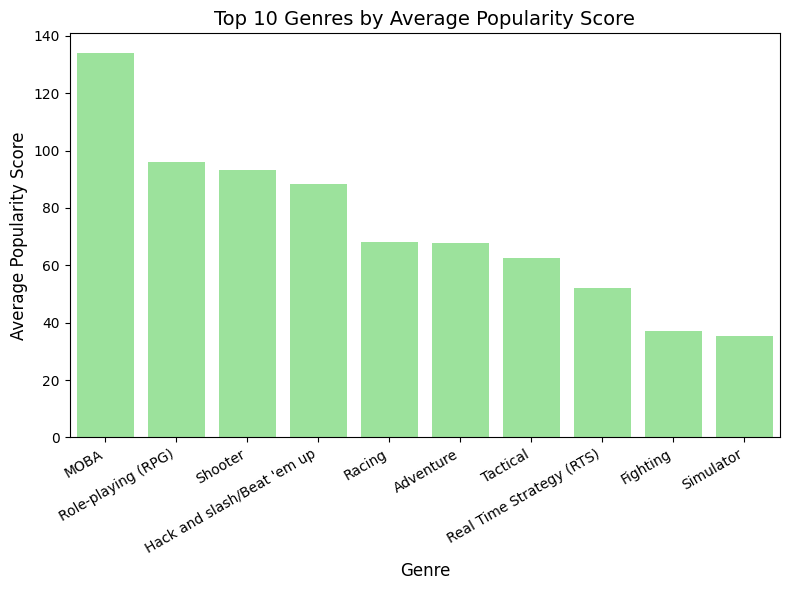

In [58]:
plt.figure(figsize=(8, 6))
sns.barplot(data=pop_stats.reset_index().sort_values(by='mean', ascending=False).head(10), x='genre_names', y='mean', color='lightgreen')

plt.title('Top 10 Genres by Average Popularity Score', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity Score', fontsize=12)

plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

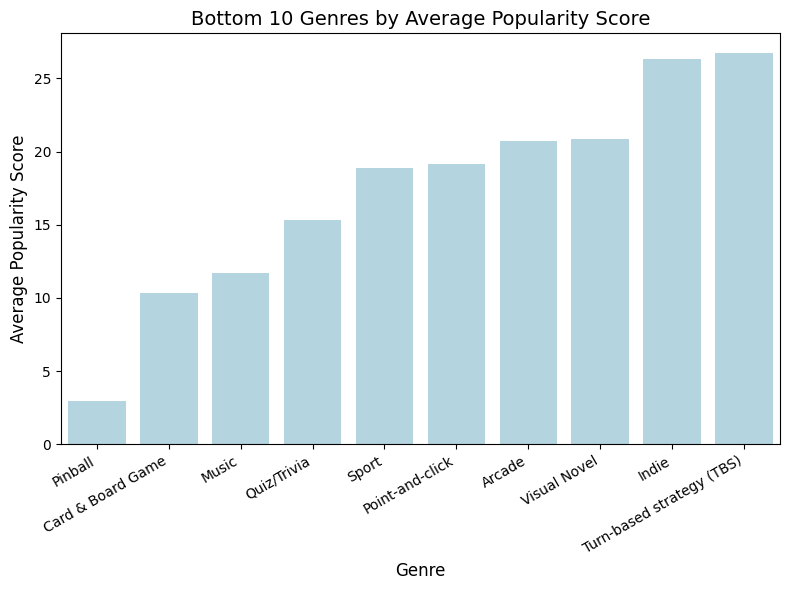

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(data=pop_stats.reset_index().sort_values(by='mean').head(10), x='genre_names', y='mean', color='lightblue')

plt.title('Bottom 10 Genres by Average Popularity Score', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity Score', fontsize=12)

plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<Axes: xlabel='genre_names', ylabel='popularity_type_id'>

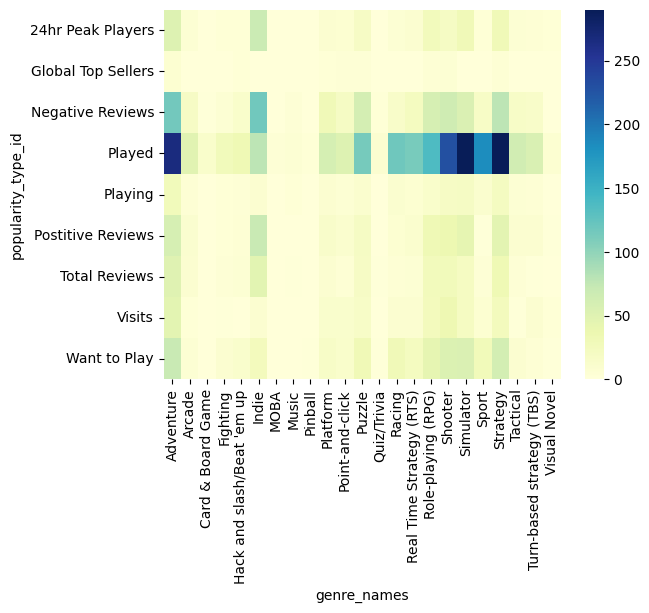

In [67]:
heat_df = pop_gen.groupby(['popularity_type_id', 'genre_names'])\
            .size().unstack().fillna(0)

sns.heatmap(heat_df, cmap='YlGnBu')

Popularity Drivers Differ by Genre

**Advanture, Simulator, Strategy** are highly driven by **actual "Played" data**, indicating strong player engagement rather than just hype.

**Indie and Adventure** genres also receive considerable attention from **user reviews**, both positive and negative.

Some genres like MOBA or Card & Board Game appear less frequently across all popularity types, suggesting potential data sparsity or niche appeal.